Estimate initial temperature (theory and notation is from https://link.springer.com/article/10.1023/B:COAP.0000044187.23143.bd)

In [1]:
import numpy as np
from copy import deepcopy
from matplotlib import pyplot as plt
from CompilerQC import Graph, Qbits, Polygons, Energy, MC, paths

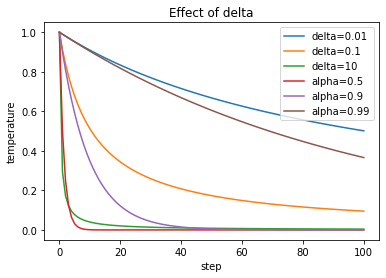

In [2]:
def visualize_delta(delta):
    """visualize the effect of delta in the temperature schedule"""
    t, temperature = 1, [1]
    for i in range(100):
        t = t / (1 + t * np.log(1 + delta))
        temperature.append(t)
    return temperature
def visualize_alpha(alpha):
    """visualize the effect of delta in the temperature schedule"""
    t, temperature = 1, [1]
    for i in range(100):
        t = alpha * t
        temperature.append(t)
    return temperature
for delta in [0.01, 0.1, 10]:
    plt.plot(visualize_delta(delta), label=f"delta={delta}")
for alpha in [0.5,0.9,0.99]:
    plt.plot(visualize_alpha(alpha), label=f"alpha={alpha}")

plt.ylabel('temperature')
plt.xlabel('step')
plt.title('Effect of delta')
plt.legend()

In [123]:
N = 6
graph = Graph.complete(N)
qbits = Qbits.init_qbits_from_dict(graph,dict())
polygon_object = Polygons(qbits)
energy = Energy(polygon_object, scaling_for_plaq3=10, scaling_for_plaq4=14)
mc = MC(energy, delta=0.07, chi_0=0.1,recording=True)
mc.current_temperature = mc.initial_temperature()
print(mc.current_temperature)
mc.record_temperature.append(mc.current_temperature)

1.214146495630488


In [124]:
#mc.temperature_kirkpatrick=True

In [125]:
mc.T_0 = mc.current_temperature

In [126]:
mc.temperature_linearC = True

In [127]:
%%time
mc.apply('', 10000)

CPU times: user 3.29 s, sys: 883 µs, total: 3.29 s
Wall time: 3.29 s


27.402610000000003

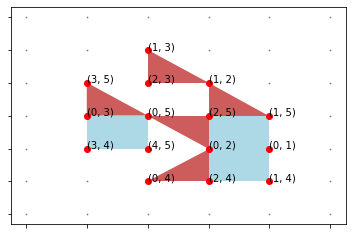

In [128]:
mc.energy.polygon_object.visualize()

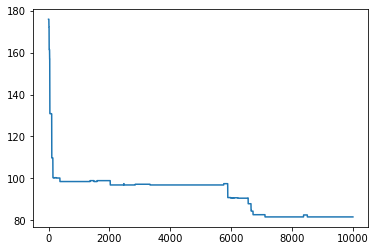

In [122]:
plt.plot(mc.record_total_energy)

In [ ]:
plt.plot(mc.record_temperature, label='temperature')
plt.plot(mc.record_mean_energy, label='mean energy')
plt.plot(mc.record_total_energy, label='current energy')
plt.xlabel('step')
plt.ylabel('energy and temperature')
plt.legend()

In [ ]:
plt.plot([mc.record_acc_probability[i-1] for i in mc.record_bad_moves])
plt.title('acceptance probability of bad moves')

In [ ]:
plt.plot([mc.record_acc_probability[i-1] for i in mc.record_good_moves])
plt.title('acceptance probability of good moves')

In [ ]:
plt.plot([mc.record_acc_probability[i-1] for i in mc.record_rejected_moves])
plt.title('acceptance probability of rejected moves')

In [ ]:
plt.plot([len([i for i in sorted(mc.record_good_moves + mc.record_bad_moves) if i in range(k * mc.repetition_rate, (k+1) * mc.repetition_rate)]) / mc.repetition_rate
for k in range(len(mc.record_temperature) // mc.repetition_rate)])
plt.ylabel('accepted/proposed moves')
plt.xlabel('temperature')

In [ ]:
mc.energy.polygon_object.visualize(), mc.energy.polygon_object.number_of_plaqs, graph.C

In [ ]:
temp = list(reversed(sorted(set(mc.record_temperature))))
len(temp)

In [ ]:
temp[0]

In [ ]:
alpha = 0.8
def kirkpatrick(alpha):
    t, temperature = 2158.9348173316203, [2158.9348173316203]
    for i in range(len(temp)):
        t = alpha * t
        temperature.append(t)
    return temperature

In [ ]:
for alpha in [0.2,0.5,0.9, 0.95]:
    plt.plot(kirkpatrick(alpha), label='kirkpatrick'+str(alpha))
plt.plot(temp)
plt.legend()

In [ ]:
C = 10
t = [np.exp(-p/(C-p +1e-3)) for p in range(C)]

In [ ]:
ts = []
t = 10
for i in range(100):
    p = i % 10 
    t = t * np.exp(-10*p/(C-p +1e-3))
    ts.append(t)
    
plt.plot(ts)

In [ ]:
plt.plot([np.exp(-p/(C-p +1e-3)) for p in range(C)], label="1")
plt.plot([np.exp(-3 * p/(C-p +1e-3)) for p in range(C)], label="3")
plt.plot([np.exp(-10 * p/(C-p +1e-3)) for p in range(C)], label="10")
plt.plot([np.exp(-0.1 *  p/(C-p +1e-3)) for p in range(C)], label="0.1")
plt.legend()

In [ ]:
def visualize_sigma(sigma):
    """visualize the effect of delta in the temperature schedule"""
    t, temperature = 1, [1]
    for sigma in mc.record_variance_energy:
        sigma = sigma ** 0.5
        t = t / (1 + t * np.log(2) / (sigma+1e-3))# + (1 / (sigma+1e-2))
        temperature.append(t)
    return temperature
for sigma in [0.01, 0.1, 10]:
    plt.plot(visualize_sigma(sigma), label=f"sigma={sigma}")
plt.legend()

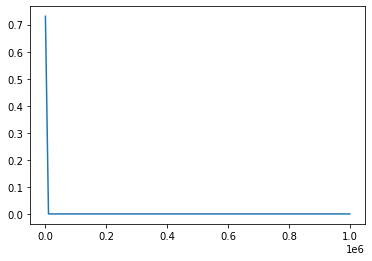

In [162]:
f = lambda x:1 - 1 / (1 + np.exp(-x))
x = np.linspace(-1,1000000,100)
plt.plot(x, f(x))